## Scattering efficiency for dielectric particle

In [1]:
from scipy.special import riccati_jn, riccati_yn
import numpy as np
import matplotlib.pyplot as plt

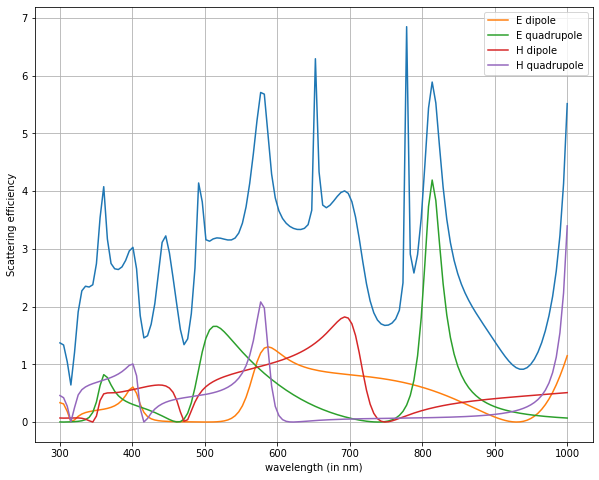

In [25]:
def riccati_1(o,y):
    n1,n1p = riccati_jn(o,y)
    return n1[o],n1p[o]

def riccati_2(o,y):
    n2,n2p = riccati_jn(o,y) 
    n3,n3p = riccati_yn(o,y)
    n4 = n2[o]+1j*n3[o]
    n4p = n2p[o]+1j*n3p[o]
    return n4,n4p


N1 = 3.5 #refractive index of particle
N = 1   #refractive index of medium
m = N1/N   #relative refractive index

a = 200e-9  #radius of the particle/scatterer
wvl_max = 1000e-9
wvl_min = 300e-9
step = 5e-9 
num = (wvl_max-wvl_min)/step
num = round(num) 
wavelength = np.linspace(wvl_min,wvl_max,num)  

max_order = 4
a_n = np.zeros((num,max_order),dtype=np.complex)
b_n = np.zeros((num,max_order),dtype=np.complex)
a_n_amp = np.zeros((num,max_order))
b_n_amp = np.zeros((num,max_order))


for n in range(0,max_order): 
#n = max_order
    for j in range(0,num):
        x = (2*np.pi*N*a)/wavelength[j]
        #we define 6 constants to make the final expressions simpler
        c1,c2= riccati_1(n,m*x)
        c3,c4= riccati_1(n,x)
        c5,c6 = riccati_2(n,x)

        #evaluate the final Mie coeffients a_n and b_n
        a_n[j,n] = (m*c1*c4 - c3*c2)/(m*c1*c6 - c5*c2)
        b_n[j,n] = (c1*c4 - m*c3*c2)/(c1*c6 - m*c5*c2)

        a_n_amp[j,n] = abs(a_n[j,n])
        b_n_amp[j,n] = abs(b_n[j,n])

#scattering cross section
Qsc = np.zeros(num) #total scattering cross section
Qsc2 = np.zeros(num) #totoal scattering efficiency (normalised cross section)
Qsc_E_1 = np.zeros((num)) #scattering efficiency of electric dipole
Qsc_E_2 = np.zeros((num)) #scattering effifiencu of electric quadrupole
Qsc_M_1 = np.zeros((num)) #scattering efficiency of magnetic dipole
Qsc_M_2 = np.zeros((num)) #scattering effifiency of magnetic quadrupole

k = np.ones(num)
G = np.pi*a*a #geometrical cross section
for j in range(num):
    Qsc[j] = 0
    k[j] = 2*np.pi/wavelength[j]
    Qsc_E_1[j] = ((2*np.pi/(k[j])**2)*(a_n_amp[j,1]**2)*3)/G
    Qsc_M_1[j] = ((2*np.pi/(k[j])**2)*(b_n_amp[j,1]**2)*3)/G
    Qsc_E_2[j] = ((2*np.pi/(k[j])**2)*(a_n_amp[j,2]**2)*5)/G
    Qsc_M_2[j] = ((2*np.pi/(k[j])**2)*(b_n_amp[j,2]**2)*5)/G
    for n in range(max_order):
        Qsc[j] = Qsc[j] + ((2*n)+1)*(a_n_amp[j,n]**2 +b_n_amp[j,n]**2)
    Qsc[j] = Qsc[j]*(2*np.pi/(k[j])**2)
    Qsc2[j] = Qsc[j]/G

plt.figure(figsize=(10,8))
plt.plot(wavelength*1e9,Qsc2)
plt.plot(wavelength*1e9,Qsc_E_1,label='E dipole')
plt.plot(wavelength*1e9,Qsc_E_2,label='E quadrupole')
plt.plot(wavelength*1e9,Qsc_M_1,label='H dipole')
plt.plot(wavelength*1e9,Qsc_M_2,label='H quadrupole')
plt.xticks(np.arange(300,1100,100))
plt.xlabel('wavelength (in nm)')
plt.ylabel('Scattering efficiency')
plt.grid(True)
plt.legend()